## Parte 1 - Instalando e importando bibliotecas que serão utilizadas

executar os códigos no terminal!

<code>conda create --yes --name workshop1 python=3.7</code>

<code>conda activate workshop1</code>

<code>conda install jupyterlab=2.2.6</code>

<code>conda install -c conda-forge pyproj=2.4.2.post1</code>

<code>conda install -c conda-forge descartes=1.1.0</code>

<code>conda install -c conda-forge geopandas=0.8.1</code>

<code>conda install -c conda-forge geopy=2.0.0</code>

<code>conda install pandas</code>

<code>conda install numpy</code>

<code>conda install matplotlib</code>

In [1]:
# importando bibliotecas que serao utilizadas
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj
import shapely.wkt
import seaborn as sns
import geopy.distance
from shapely.geometry import Point
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
pd.options.mode.chained_assignment = None
%matplotlib inline

## Parte 2 - Importando as informações do DataSet proposta para o projeto

In [2]:
# lendo o conjunto de dados
df = pd.read_csv('Real_State_Properati.csv', sep = '\t')
df_original = df.copy()

## Parte 3 - Entender o que cada coluna significa.

property_type : Tipo de propriedade.

place_name : Nome do bairro.

country_name : Nome do pais.

state_name: Localidade da propriedade.

lat : Latitude

lon : Longitude

price : Preco publicado na propaganda.

currency : tipo de moeda utilizada no anuncio.

surface_total_in_m2 : metragem da area do imovel.

## Parte 3 - Entender o que cada coluna significa.

Tipo de propriedade.
Nome do bairro.
Nome do pais.
Localização da propriedade.
Latitude
Longitude
Preço publicado na propaganda.
tipo de moeda utilizada no anuncio.
metragem da area do imovel.

In [3]:
# checando as primeiras linhas do conjunto
df.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0


## Após avaliar como os dados estão distribuídos no dataset, nota-se que não existem valores nulos.

In [4]:
# informação das colunas para ver se existem campos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


## Convertendo os valores de habitação que estão precificados em Peso Argentino para Dólares dos EUA
Após avaliação inicial nota-se que grande parte das informações estão precificadas em USD

In [3]:
# convertendo preços com moeda ARS para USD

#1 ARS =  0.0085 USD

df['price_ajustado'] = df['price']

df['currency_ajustado'] = df['currency']

df.loc[df['currency'] =='ARS', 'price_ajustado'] = df['price'] * 0.0085

df.loc[df['currency'] =='ARS', 'currency_ajustado'] = df['currency'] = 'USD'

Criando o campo com os pontos plotados na Argentina

In [5]:
# criando o campo da geometria

df['geometry'] = gpd.points_from_xy(df['lat'], df['lon'])
#df.head()

## Avaliando distribuição dos dados.

#### Nota-se que todos os nossos dados estão localizados na Argentina e em sua Capital Federal (Buenos Aires).

#### Os dados das habitações estão concentrados em casas classificadas como "Apartamentos"

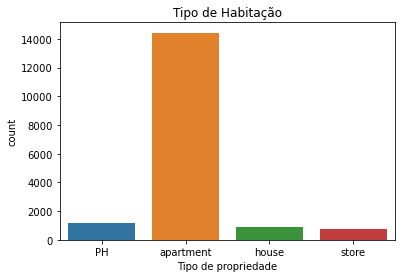

In [6]:
# grande parte dos imoveis estão concentrados em apartamentos
sns.countplot(data = df, x = 'property_type')
plt.title('Tipo de Habitação')
plt.xlabel('Tipo de propriedade')
plt.show()

In [8]:
df['place_name'].value_counts(normalize = True) * 100

Palermo            8.720896
Belgrano           8.686059
Caballito          8.064797
Recoleta           5.811996
Flores             5.184927
                     ...   
Parque Chas        0.087093
Palermo Viejo      0.058062
Villa Soldati      0.040643
Villa Riachuelo    0.017419
Catalinas          0.005806
Name: place_name, Length: 62, dtype: float64

In [9]:
df['place_name'].unique()

array(['Mataderos', 'Belgrano', 'Palermo', 'Flores', 'Boedo',
       'Las Cañitas', 'Puerto Madero', 'Balvanera', 'Caballito', 'Nuñez',
       'Floresta', 'Barracas', 'Recoleta', 'Congreso', 'Villa Crespo',
       'Chacarita', 'Almagro', 'Constitución', 'Colegiales',
       'Villa Urquiza', 'Barrio Norte', 'Palermo Hollywood', 'Saavedra',
       'Paternal', 'Agronomía', 'Villa Pueyrredón', 'Coghlan',
       'Parque Centenario', 'San Telmo', 'Monserrat', 'Boca',
       'Parque Avellaneda', 'San Cristobal', 'Abasto', 'Versalles',
       'Villa del Parque', 'Monte Castro', 'Retiro', 'Capital Federal',
       'Parque Chas', 'Palermo Chico', 'Villa Devoto', 'Palermo Soho',
       'Centro / Microcentro', 'Liniers', 'Tribunales', 'Once',
       'San Nicolás', 'Parque Chacabuco', 'Velez Sarsfield', 'Catalinas',
       'Pompeya', 'Parque Patricios', 'Palermo Viejo', 'Villa Lugano',
       'Villa Luro', 'Villa General Mitre', 'Villa Ortuzar',
       'Villa Santa Rita', 'Villa Soldati', 'Villa Re

In [10]:
df['place_name'].value_counts()

Palermo            1502
Belgrano           1496
Caballito          1389
Recoleta           1001
Flores              893
                   ... 
Parque Chas          15
Palermo Viejo        10
Villa Soldati         7
Villa Riachuelo       3
Catalinas             1
Name: place_name, Length: 62, dtype: int64

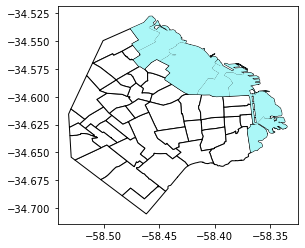

In [7]:
df_bairros = pd.read_csv("Neighborhoods.csv", 
                         encoding = 'latin1'
                        )

import shapely.wkt

df_bairros["WKT"] = df_bairros["WKT"].apply(shapely.wkt.loads) 
geo_bairros = gpd.GeoDataFrame(df_bairros, geometry = 'WKT')

fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_bairros.plot(ax = ax,
                 color = 'white',
                 edgecolor = 'black'
                )

labels_subconjunto = ['PUERTO MADERO','BELGRANO', 'PALERMO', 'RETIRO', 'BOCA', 'RECOLETA', 'NUÑEZ']   #escolher o subconjunto !!!

geo_subconjunto = geo_bairros.loc[geo_bairros['NEIGHBORHOOD'].isin(labels_subconjunto)]

geo_subconjunto.plot(ax = ax,
                    color = '#abf7f7'
                    # edge_color = 'red'
                    )

plt.show();

In [8]:
bairros_subconjunto = ['Puerto Madero', 'Palermo', 'Belgrano', 'Retiro', 'Boca', 'Recoleta', 'Nuñez']
mask_subconjunto = (df['place_name'].isin(bairros_subconjunto)) & (df['property_type'].isin(['apartment']))

df_subconjunto = df[mask_subconjunto]

#Escolhemos com propósito o subconjunto de imóveis, 'apartamentos na zona litorânea'

### Feature Engineering

In [9]:
dict_bairro_pop = {'Palermo': 225970,  #População por Bairro
                   'Puerto Madero': 6726,
                   'Belgrano': 126831,
                   'Retiro': 65413,
                   'Boca': 45113,
                   'Recoleta': 157932,
                   'Nuñez': 51949}

dict_bairro_pop_dens = {'Palermo': 14324, #Densidade populacional por Bairro (pop/km2)
                        'Puerto Madero': 1338,
                        'Belgrano': 15978,
                        'Retiro': 14450,
                        'Boca': 8981,
                        'Recoleta': 25100,
                        'Nuñez': 11943}

dict_boas_universidades = {'Palermo': 1, #Se o bairro tem várias e boas universidades
                           'Puerto Madero': 0,
                           'Belgrano': 0,
                           'Retiro': 1,
                           'Boca': 0,
                           'Recoleta': 1,
                           'Nuñez': 0}

dict_pontos_turisticos = {'Palermo': 1, #Se o bairro tem pontos turísticos interessantes (talvez seja melhor calcular distâncias e adicionar pesos a cada um dos pontos turísticos)
                          'Puerto Madero': 1,
                          'Belgrano': 0,
                          'Retiro': 1,
                          'Boca': 0,
                          'Recoleta': 1,
                          'Nuñez': 0}

In [10]:
df_subconjunto['bairro_pop'] = df_subconjunto['place_name'].map(dict_bairro_pop)
df_subconjunto['bairro_pop_dens'] = df_subconjunto['place_name'].map(dict_bairro_pop_dens)
df_subconjunto['boas_unis'] = df_subconjunto['place_name'].map(dict_boas_universidades)
df_subconjunto['ptos_turisticos'] = df_subconjunto['place_name'].map(dict_pontos_turisticos)

In [17]:
df_subconjunto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4524 entries, 2 to 17221
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   property_type        4524 non-null   object  
 1   place_name           4524 non-null   object  
 2   country_name         4524 non-null   object  
 3   state_name           4524 non-null   object  
 4   lat                  4524 non-null   float64 
 5   lon                  4524 non-null   float64 
 6   price                4524 non-null   float64 
 7   currency             4524 non-null   object  
 8   surface_total_in_m2  4524 non-null   float64 
 9   price_ajustado       4524 non-null   float64 
 10  currency_ajustado    4524 non-null   object  
 11  geometry             4524 non-null   geometry
 12  bairro_pop           4524 non-null   int64   
 13  bairro_pop_dens      4524 non-null   int64   
 14  boas_unis            4524 non-null   int64   
 15  ptos_turisticos     

In [11]:
df = df_subconjunto.copy()

## Nota-se que os valores dos apartamentos contém diversos outliers.

### As observações consideradas outliers serão removidas.

## Remoção de Outliers - Coluna Tamanho da habitação

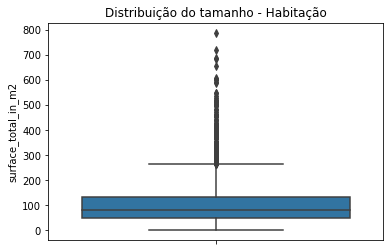

In [12]:
sns.boxplot(data = df, y ='surface_total_in_m2')
plt.title('Distribuição do tamanho - Habitação')
plt.show()

In [13]:
q3, q1 = np.percentile(df['surface_total_in_m2'], [75, 25])

interquartil = q3 - q1

limsup = q3 + 1.5 * interquartil
print(f'Limite superior do corte: {limsup}')


Limite superior do corte: 264.0


In [14]:
df = df.drop(df[df['surface_total_in_m2'] > limsup].index)
df.shape

(4287, 16)

In [15]:
# retirar metragem = 0

zeros = df['surface_total_in_m2'] == 0
df = df[~zeros]

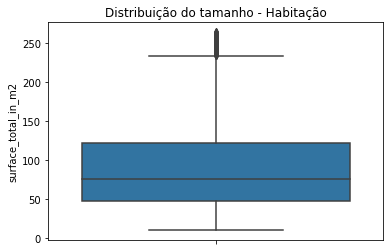

In [16]:
sns.boxplot(data = df, y = 'surface_total_in_m2')
plt.title('Distribuição do tamanho - Habitação')
plt.show()

In [24]:
# df[['surface_total_in_m2', 'distancia', 'price_ajustado']].sort_values(by = 'surface_total_in_m2', ascending= True).head(20)  
#Pode ser interessante retirar os imóveis com área muito pequena

## Remoção de Outliers - Coluna preço

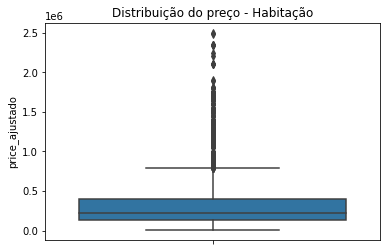

In [17]:
# distribuição do preço
sns.boxplot(data= df, y='price_ajustado')
plt.title('Distribuição do preço - Habitação')
plt.show()

In [18]:
q3, q1 = np.percentile(df['price_ajustado'], [75, 25])

interquartil = q3 - q1

limsup = q3 + 1.5 * interquartil
print(f'Limite superior do corte: {limsup}')

Limite superior do corte: 785000.0


In [19]:
df = df.drop(df[df['price_ajustado'] > limsup].index)
df.shape

(3986, 16)

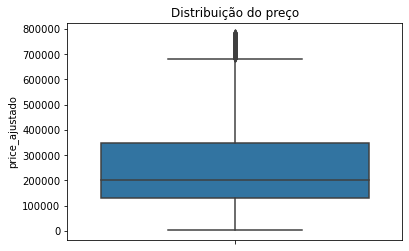

In [20]:
# distribuição do preço
sns.boxplot(data= df, y='price_ajustado')
plt.title('Distribuição do preço')
plt.show()

## Calculando a distância de cada propriedade para o marco zero da argentina

### Removendo 1 outlier presente nos dados (ditância 630km do centro)

In [21]:
# calculando distancia para o centro

ponto_marcozero = (-34.609447506344914, -58.38743491792922)

In [22]:
for i in df.index:
    df.loc[i, 'distancia'] = geopy.distance.geodesic(ponto_marcozero,
                                                     (df.loc[i, 'geometry'].x,
                                                      df.loc[i, 'geometry'].y)
                                                     ).kilometers

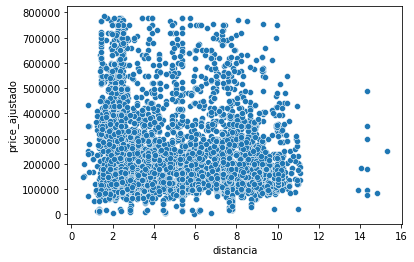

In [23]:
sns.scatterplot(
    data=df,
    y = 'price_ajustado',
    x = 'distancia'
)
plt.show()

In [24]:
df['distancia'].describe()

count    3986.000000
mean        5.358810
std         2.784943
min         0.548568
25%         2.646580
50%         5.162926
75%         7.855169
max        15.299520
Name: distancia, dtype: float64

In [25]:
_i = df[df['distancia'] > 600].index

df.drop(_i, inplace=True)
df.shape

(3986, 17)

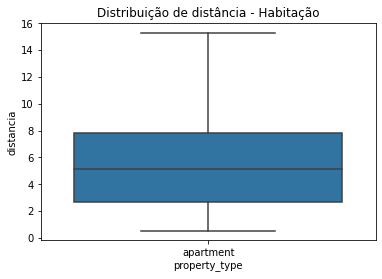

In [26]:
sns.boxplot(data = df,
            y = 'distancia',
            x = 'property_type'
            )
plt.title('Distribuição de distância - Habitação')
plt.show()

## Checando a correlação das variáveis "área total da habitação em M2" e "preço convertido"

In [ ]:
features_e_target = ['price_ajustado', 'distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos']

sns.pairplot(df[features_e_target], diag_kind = 'kde');

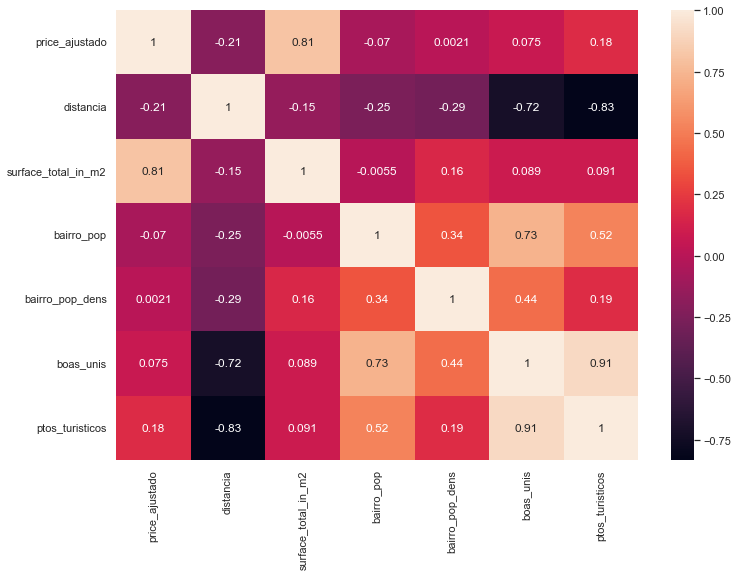

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df[features_e_target].corr(), annot=True);

## Calculando a correlação de todas as variáveis

## Selecionando colunas que serão utilizadas na criação do modelo.

In [101]:
features = ['distancia', 'surface_total_in_m2'] #'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos']

X = df[features]
y = df[['price_ajustado']]

X = sm.add_constant(X)

print(f'Shape das features: {X.shape}')
print(f'Shape do target: {y.shape}')

Shape das features: (3986, 3)
Shape do target: (3986, 1)


In [102]:
# # separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

print(f'Número de observações em treino: {X_train.shape[0]}')
print(f'Número de observações em teste: {X_test.shape}')


Número de observações em treino: 2790
Número de observações em teste: (1196, 3)


In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2790, 3)
(1196, 3)
(2790, 1)
(1196, 1)


In [104]:
from sklearn.preprocessing import StandardScaler

scaleX = StandardScaler()

X_train = scaleX.fit_transform(X_train)
y_train = scaleX.fit_transform(X_test)

In [105]:
# criando constante do modelo OLS
#X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

model = sm.OLS(y, X)
resultados_OLS = model.fit()
print(resultados_OLS.summary())

#'distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos''distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos'

                            OLS Regression Results                            
Dep. Variable:         price_ajustado   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     3989.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:12:20   Log-Likelihood:                -51496.
No. Observations:                3986   AIC:                         1.030e+05
Df Residuals:                    3983   BIC:                         1.030e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.053e+04   4

### Aplicando o predict do modelo

In [108]:
# predizendo respostas
# X_test = pd.DataFrame(X_test, columns=['distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos'])

X_test2 = np.reshape(X_test, 7, 3588)


y_pred = model.predict(X)

#print(X_test)

# y_pred = pd.DataFrame(y_pred, columns=['predict'])

TypeError: order must be str, not int

In [ ]:
df_validacao = y_test.join(y_pred)

In [ ]:
r2 = model.rsquared
print(f'valor de R2: {r2}')
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.title(f'Preço x Área - Ajuste Reta - R2 = {r2.round(3)}')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.show()

In [ ]:
#b0 e b1
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

In [ ]:
# top 5 bairros com maior média de preço preço

df[['place_name', 'price_ajustado']].groupby('place_name').mean('price_ajustado').sort_values(by = 'price_ajustado', ascending = False).round(2).head(5)

In [ ]:
erro_medio = metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
print(erro_medio.round(2))